C:\Users\PALANISAMY\AppData\Local\Temp\ipykernel_9340\2078597213.py:94: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((224,224), Image.ANTIALIAS) # resizes image without ratio


[array([[[195, 197, 212],
        [195, 197, 212],
        [195, 197, 212],
        ...,
        [189, 191, 206],
        [189, 191, 206],
        [189, 191, 206]],

       [[195, 197, 212],
        [195, 197, 212],
        [195, 197, 212],
        ...,
        [189, 191, 206],
        [189, 191, 206],
        [189, 191, 206]],

       [[195, 197, 212],
        [195, 197, 212],
        [195, 197, 212],
        ...,
        [189, 191, 206],
        [189, 191, 206],
        [189, 191, 206]],

       ...,

       [[121,  79,  57],
        [129,  87,  65],
        [137,  95,  73],
        ...,
        [131,  95,  59],
        [104,  68,  32],
        [146, 110,  74]],

       [[128,  86,  64],
        [135,  93,  71],
        [140,  98,  76],
        ...,
        [159, 124,  88],
        [152, 116,  80],
        [177, 141, 105]],

       [[130,  88,  66],
        [136,  94,  72],
        [139,  97,  76],
        ...,
        [134,  98,  64],
        [136, 100,  66],
        [157, 121,  87]

The model has 338 inputs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (N

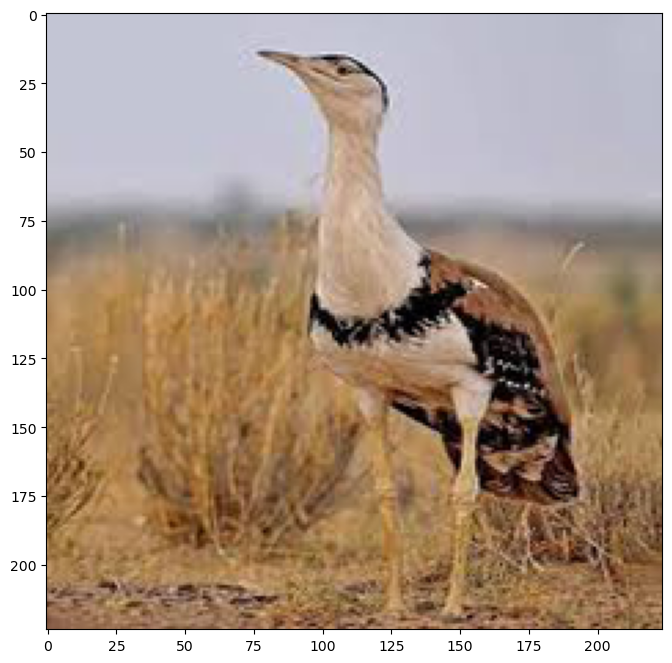

In [2]:
# -*- coding: utf-8 -*-
#Libraries for Locating and loading data
import pathlib
from pathlib import Path
import os, gc, glob, random
from PIL import Image

#For matrix calculations and data Managememnt
import pandas as pd
import numpy as np
import sklearn

#Importing libraries required for the model
import tensorflow as tf
import keras 
import keras.backend as K

from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.applications import *
from keras.preprocessing import *
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, BatchNormalization,Dropout
from keras.models import Model
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

#For plotting charts used for data visualizations
import matplotlib.pyplot as plt

#Used to load model in testing phase
from keras.models import load_model
from keras.models import model_from_json


#Getting the names for all the folders containing data
import os
from os import listdir
dirName = 'Digital Naturalist Dataset'
folders = listdir(dirName)
        
def getListOfFiles(dirName):
# create a list of sub directories and files(if any)
# names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for fol_name in listOfFile:
        fullPath = os.path.join(dirName, fol_name)
        allFiles.append(fullPath)
              
    return allFiles

Folders = getListOfFiles(dirName)
len(Folders)
subfolders = []
for num in range(len(Folders)):
    sub_fols = getListOfFiles(Folders[num])
    subfolders+=sub_fols
#Now, the subfolders contains the address to all our data folders for each class
subfolders

#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#Loading the data and pre processing it to make it in trainable format
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////


#X data will includes the data generated for each image
#Y data will include a id no:, for every different boat type in out boats folder
#a different number is being assigned. That will be tha label we're classifying.
X_data = []
Y_data = []


id_no=0
found = []
#itering in all folders under Boats folder
for paths in subfolders:
    #setting folder path for each boat type
    files = glob.glob (paths + "/*.jpg")
    found.append((paths.split('\\')[-2],paths.split('\\')[-1]))
    
    #itering all files under the folder one by one
    for myFile in files:
        img = Image.open(myFile)
        #img.thumbnail((width, height), Image.ANTIALIAS) # resizes image in-place keeps ratio
        img = img.resize((224,224), Image.ANTIALIAS) # resizes image without ratio
        #convert the images to numpy arrays
        img = np.array(img)
        if img.shape == ( 224, 224, 3):
            # Add the numpy image to matrix with all data
            X_data.append (img)
            Y_data.append (id_no)
    id_no+=1

#to see our data
print(X_data)
print(Y_data)

Y_data

#converting lists to np arrays again
X = np.array(X_data)
Y = np.array(Y_data)

# Print shapes to see if they are correct
print("x-shape",X.shape,"y shape", Y.shape)

X = X.astype('float32')/255.0
y_cat = to_categorical(Y_data, len(subfolders))

print("X shape",X,"y_cat shape", y_cat)
print("X shape",X.shape,"y_cat shape", y_cat.shape)

#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#Splitting the data to Test and Train
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2)
print("The model has " + str(len(X_train)) + " inputs")

#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#M O D E L    B U I L D I N G
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////


early_stop_loss = EarlyStopping(monitor='loss', patience=3, verbose=1)
early_stop_val_acc = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)
model_callbacks=[early_stop_loss, early_stop_val_acc]

#defining our model, All the layers and configurations
def load_CNN(output_size):
  K.clear_session()
  model = tf.keras.Sequential()
  model.add(Dropout(0.4,input_shape=(224, 224, 3)))
  
  model.add(Conv2D(256, (5, 5),input_shape=(224, 224, 3),activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  #model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  #model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  #model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))

  model.add(Dense(output_size, activation='softmax'))
  
  return model

#Building a model based on the above defined function
model = load_CNN(6) #Number of Columns / Outputs
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
model.summary() #to print model summary
weights = model.get_weights() #to get the weights from our model

#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#Fitting the model on different batch sizes to see which ones turns out to be the best
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////

#some arrays to store the result of each model (model trained on each bath size)
histories_acc = []
histories_val_acc = []
histories_loss = []
histories_val_loss = []


model.set_weights(weights)
h=model.fit(X_train,y_train,
              batch_size=16,
              epochs=7,
              verbose=1,
              callbacks=[early_stop_loss],
              shuffle=True,
              validation_data=(X_test, y_test))

model.summary() #to print model summary

#printing the keys we have for the stores values
print(h.history.keys())
#appendind the data for each epoch in a arr, and for each batch size
histories_acc.append(h.history['accuracy'])
histories_val_acc.append(h.history['val_accuracy'])
histories_loss.append(h.history['loss'])
histories_val_loss.append(h.history['val_loss'])

#converting into numpy arrays
histories_acc = np.array(histories_acc)
histories_val_acc = np.array(histories_val_acc)
histories_loss = np.array(histories_loss)
histories_val_loss = np.array(histories_val_loss)

#here we have 3 columns and 6 rows each,ever row represetns differnt bath size,
#every column represent different epoch scores.
print('histories_acc',histories_acc,
      'histories_loss', histories_loss,
      'histories_val_acc', histories_val_acc,
      'histories_val_loss', histories_val_loss)


#loading Test Data 
image_number = random.randint(0,len(X_test))
print(image_number)

#plotting the test image
plt.figure(figsize=(8, 8))
plt.imshow(X_test[image_number])


#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#Predicting the image's classes
#individual scores for each class as well as class with the highest score is printed
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////

#making predictions ,storing result as array of probabilities of each class predicted

predictions = model.predict([X_test[image_number].reshape(1, 224,224,3)])


for idx, result, x in zip(range(0,6), found, predictions[0]):
   print("Label: {}, Type : {}, Species : {} , Score : {}%".format(idx, result[0],result[1], round(x*100,3)))


#predicting the class with max probability
#ClassIndex=model.predict_classes([X_test[image_number].reshape(1, 224,224,3)])
ClassIndex = np.argmax(predictions,axis=1)

#getting the index of the class which we can pass 
#to the boat_types list to get the boat type name
ClassIndex

#printing the final output
print(found[ClassIndex[0]])

#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#savig necessary model files
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////
#\\\\\\\\/////////\\\\\\\\////////\\\\\\\\\////////

# serialize model to JSON

model_json = model.to_json() #indent=2
with open("final_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to H5

model.save_weights("final_model.h5")
print("Saved model to disk")


In [6]:
!tar -zcvf image_classify.tar.gz final_model.h5

a final_model.h5
